In [1]:
# Import dataset

import pandas as pd

df = pd.read_csv("data/bank-full.csv", sep=";")
df.head()
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


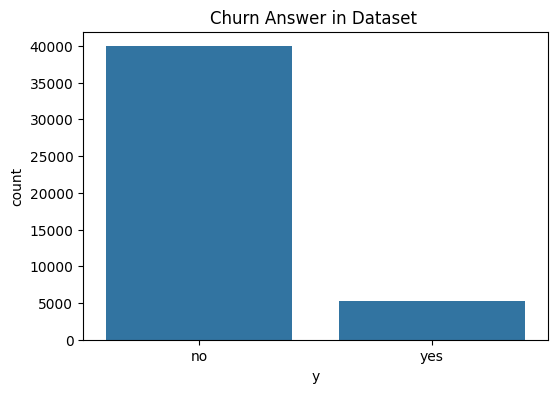

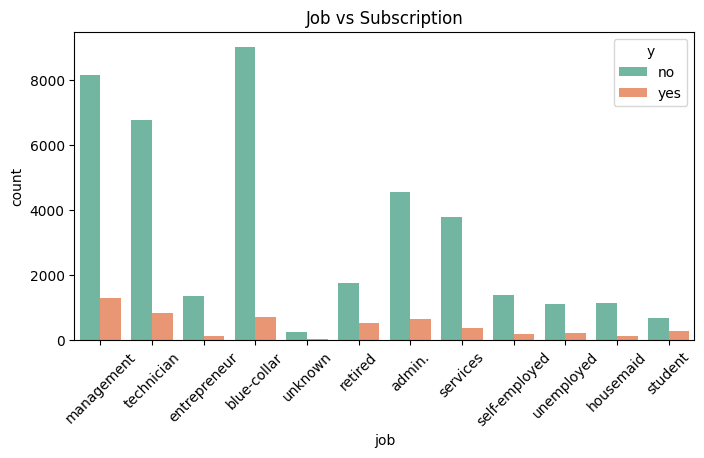

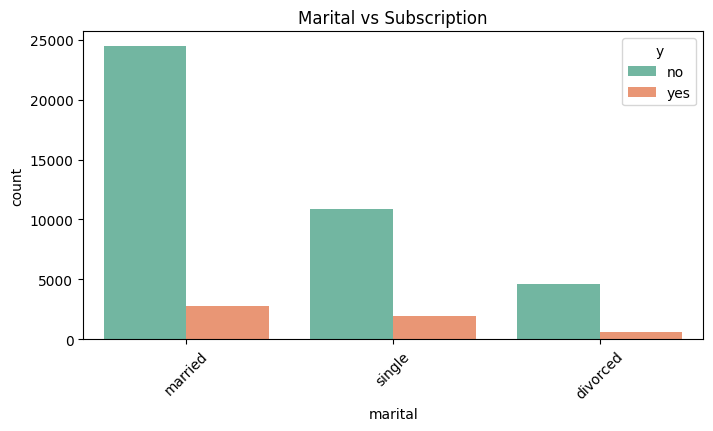

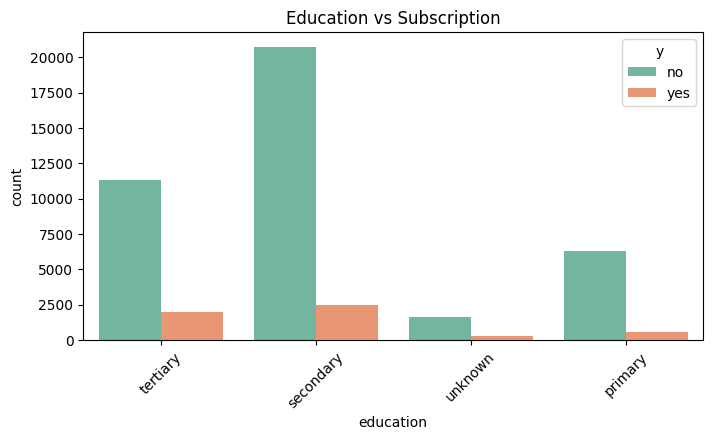

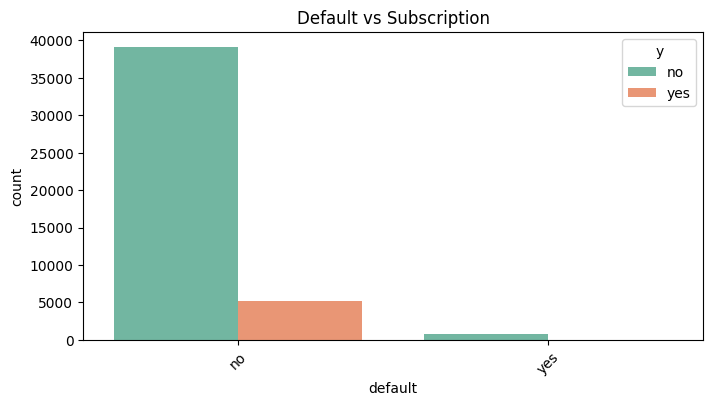

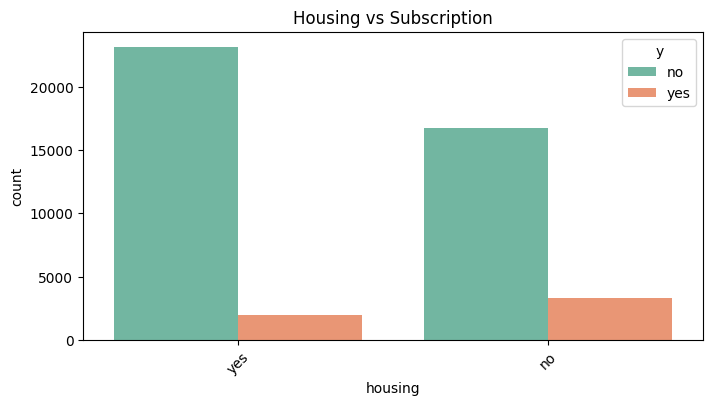

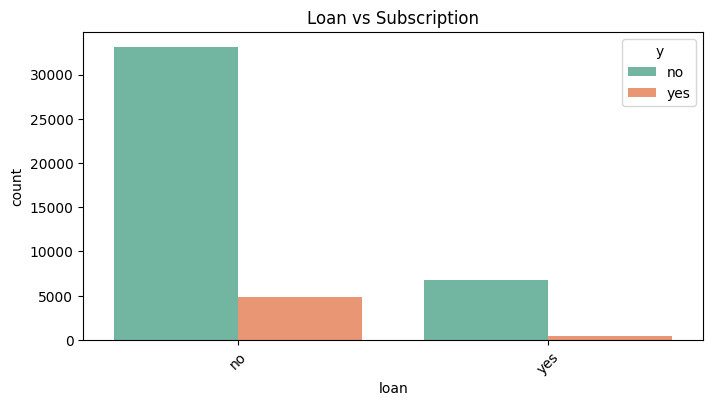

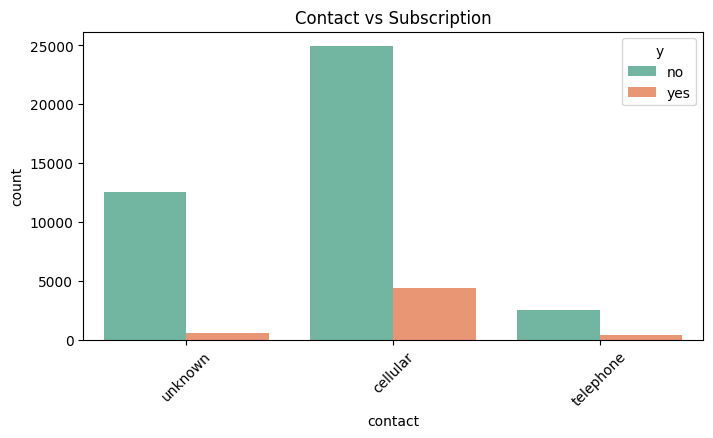

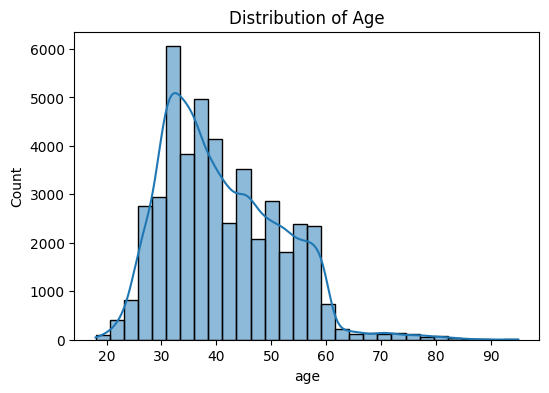

C:\Users\Hp\AppData\Local\Temp\ipykernel_5224\947149721.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="y", y=col, data=df, palette="Set3")


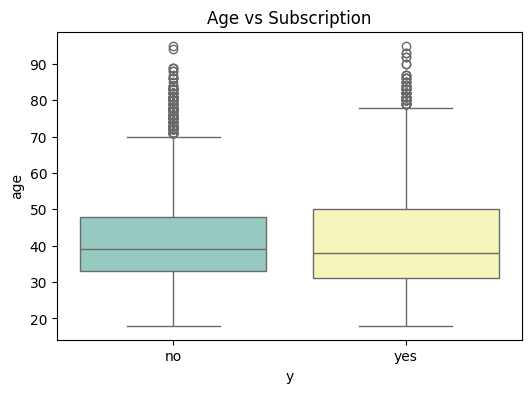

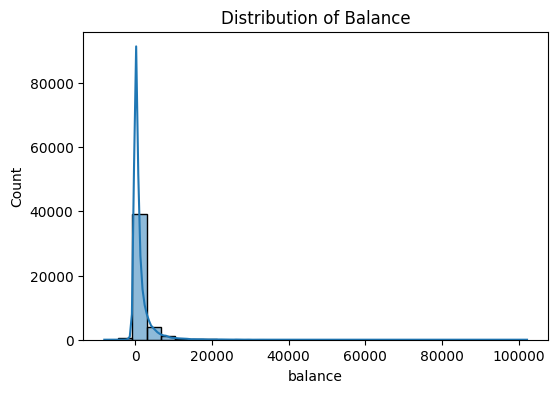

C:\Users\Hp\AppData\Local\Temp\ipykernel_5224\947149721.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="y", y=col, data=df, palette="Set3")


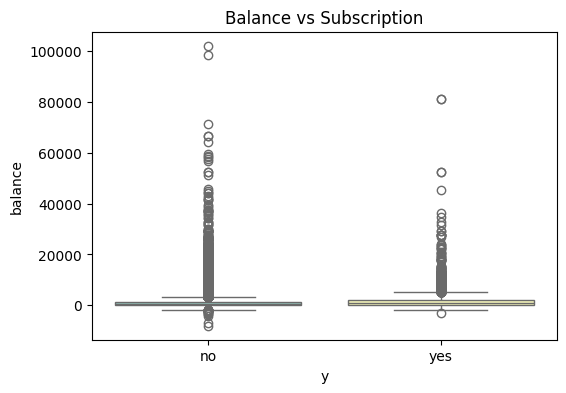

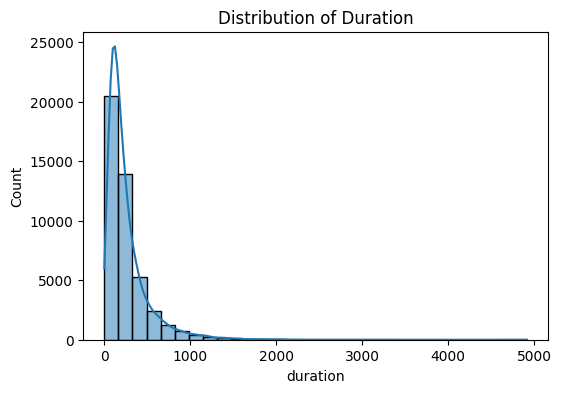

C:\Users\Hp\AppData\Local\Temp\ipykernel_5224\947149721.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="y", y=col, data=df, palette="Set3")


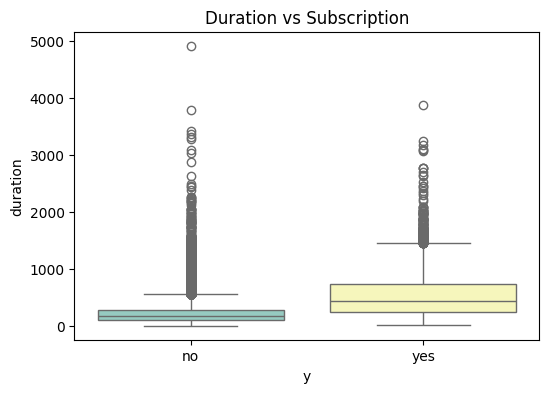

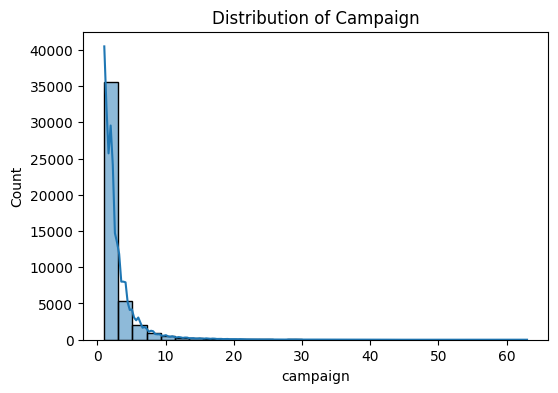

C:\Users\Hp\AppData\Local\Temp\ipykernel_5224\947149721.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="y", y=col, data=df, palette="Set3")


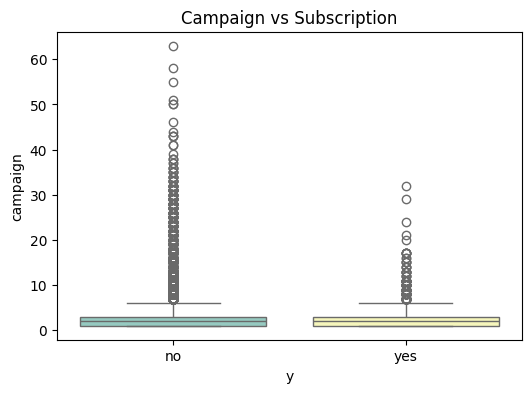

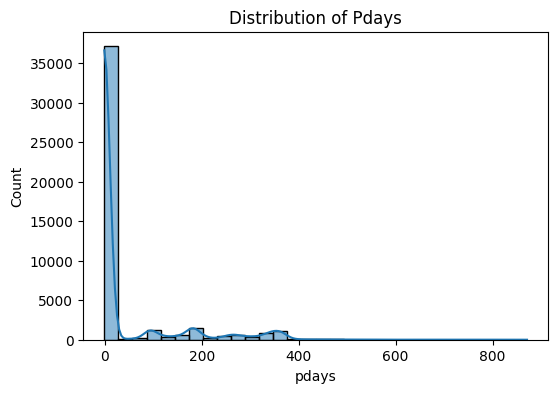

C:\Users\Hp\AppData\Local\Temp\ipykernel_5224\947149721.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="y", y=col, data=df, palette="Set3")


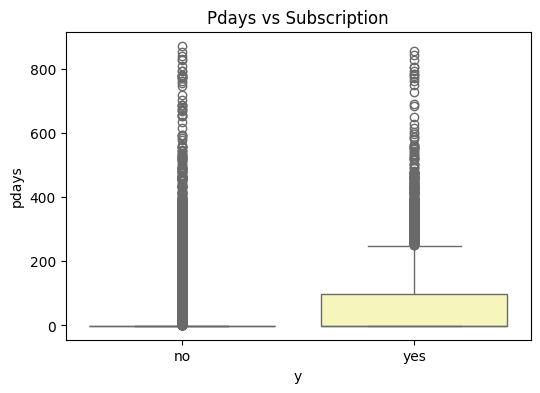

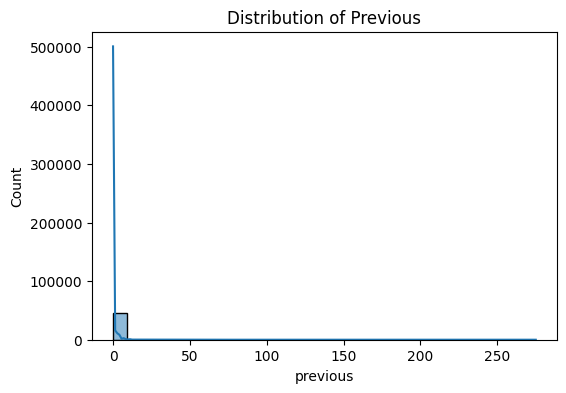

C:\Users\Hp\AppData\Local\Temp\ipykernel_5224\947149721.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="y", y=col, data=df, palette="Set3")


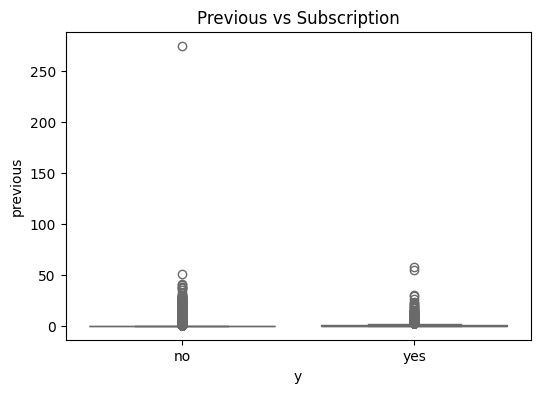

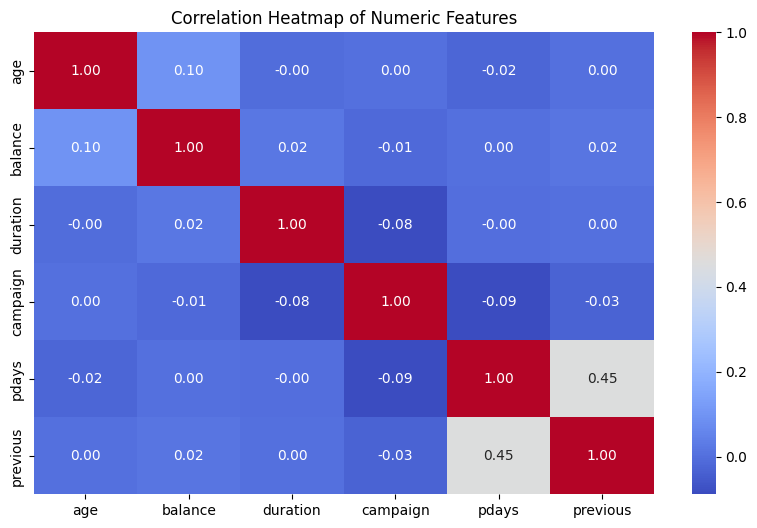

In [2]:
# Perform Visualization

import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns

# ---------- Count Yes/No ----------


plt.figure(figsize=(6,4))
sns.countplot(x = 'y',data= df)
plt.title("Churn Answer in Dataset ")
plt.show()

categorical_cols = ["job", "marital", "education", "default", "housing", "loan", "contact"]

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue="y", data=df, palette="Set2")
    plt.title(f"{col.capitalize()} vs Subscription")
    plt.xticks(rotation=45)
    plt.show()

# ---------- Numerical Features ----------
numeric_cols = ["age", "balance", "duration", "campaign", "pdays", "previous"]

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col.capitalize()}")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.boxplot(x="y", y=col, data=df, palette="Set3")
    plt.title(f"{col.capitalize()} vs Subscription")
    plt.show()

# ---------- Correlation Heatmap ----------
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()





In [3]:
# Make a Model Based on Decision tree algo


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

df = pd.read_csv("data/bank-full.csv", sep=";")

y = df["y"]

# Features (drop target column)
X = df.drop("y", axis=1)

X = pd.get_dummies(X, drop_first=True)   # One-hot encoding

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_res, y_train_res)

y_pred = dtc.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Before SMOTE: y
no     31970
yes     4198
Name: count, dtype: int64
After SMOTE: y
no     31970
yes    31970
Name: count, dtype: int64
Accuracy: 0.8581223045449519

Classification Report:
               precision    recall  f1-score   support

          no       0.94      0.90      0.92      7952
         yes       0.43      0.55      0.48      1091

    accuracy                           0.86      9043
   macro avg       0.68      0.72      0.70      9043
weighted avg       0.87      0.86      0.87      9043


Confusion Matrix:
 [[7161  791]
 [ 492  599]]
